In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import special, optimize, io, misc
import random

In [2]:
mat = io.loadmat('ex3data1.mat')

<IPython.core.display.Javascript object>


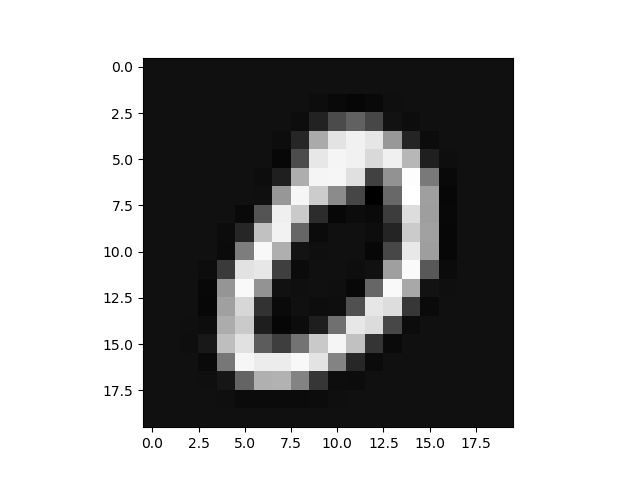

In [3]:
y = pd.DataFrame(mat['y'], columns=['Number'])
X = pd.DataFrame(mat['X'])

im = X.iloc[250, :]
ar = [im.iloc[i:i+20] for i in range(0, 381, 20)]
ar = np.transpose(np.asarray(ar))

plt.imshow(ar, cmap='gray')
plt.show()

X.fillna(value=0, inplace=True)
X.columns = [str(i) for i in range(1, 401)]
X.insert(0, '0', 1)
Y = y['Number']
Y[Y == 10] = 0

In [4]:
m = X.shape[0]
n = X.shape[1] - 1

def h(theta, x):
    return special.expit(np.dot(x, theta))

def cost(theta, x, y, l):
    return (-1/m) * (np.dot(y.T, np.log(h(theta, x))) + np.dot(np.transpose(1 - y), np.log(1 - h(theta, x)))) + (l/(2*m))*(np.sum(np.square(theta)) - theta[0])

def gradient(theta, x, y, l):
    regParams = (l/m) * theta
    regParams[0] = 0
    
    regCost = np.dot(x.T, h(theta, x) - y)/m
    
    return regCost + regParams

In [5]:
classifiers = []
def learn():
    for i in range(0, 10):
        print("Digit: " + str(i))
        tY = Y.copy()
        tY[tY == i] = 200
        tY[tY != 200] = 0
        tY[tY == 200] = 1
        initial = np.random.uniform(-1, 1, (n+1))
        print("Before optimization: " + str(cost(initial, X, tY, 1)))
        res = optimize.minimize(fun=cost, x0=initial, jac=gradient, args=(X, tY, 1))
        print("After optimization: " + str(res.fun))
        
        classifiers.append(res.x)


In [6]:
learn()

Digit: 0
Before optimization: 0.529862635788
After optimization: 0.030626313557396027
Digit: 1
Before optimization: 0.891671735576
After optimization: 0.027823651212375195
Digit: 2
Before optimization: 0.648497876503
After optimization: 0.06984994804877245
Digit: 3
Before optimization: 2.03551768674
After optimization: 0.08124456983722181
Digit: 4
Before optimization: 2.78015434196
After optimization: 0.05266124475753329
Digit: 5
Before optimization: 0.614148710088
After optimization: 0.07684469085222591
Digit: 6
Before optimization: 0.69600999974
After optimization: 0.03610099002976612
Digit: 7
Before optimization: 0.714207207141
After optimization: 0.0472953238272725
Digit: 8
Before optimization: 0.85224562559
After optimization: 0.10567398447631211
Digit: 9
Before optimization: 2.71862978216
After optimization: 0.0918923397668484


In [7]:
classifiers = np.transpose(np.asarray(classifiers))

In [8]:
hypotheses = np.dot(X, classifiers)
predictions = hypotheses.argmax(axis = 1)

In [9]:
pred = predictions == Y

In [10]:
print("Accuracy: " + str((pred[pred == True].value_counts()/len(pred))* 100))

Accuracy: True    94.28
Name: Number, dtype: float64


<IPython.core.display.Javascript object>


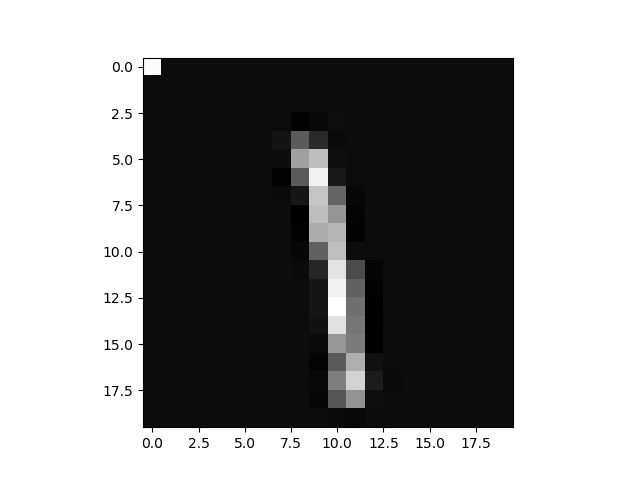

1

In [11]:
im = X.iloc[700, :]
ar = [im.iloc[i:i+20] for i in range(0, 381, 20)]
ar = np.transpose(np.asarray(ar))

plt.figure(2)
plt.imshow(ar, cmap='gray')
plt.show()

hypotheses = np.dot(X.iloc[700, :], classifiers)
predictions = hypotheses.argmax(axis = 0)
predictions